In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import hddm
print (hddm.__version__)
import numpy as np

0.6.1


C:\Users\hajih\Anaconda3\envs\hddm\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
import numpy
numpy.__version__

'1.17.5'

<IPython.core.display.Javascript object>


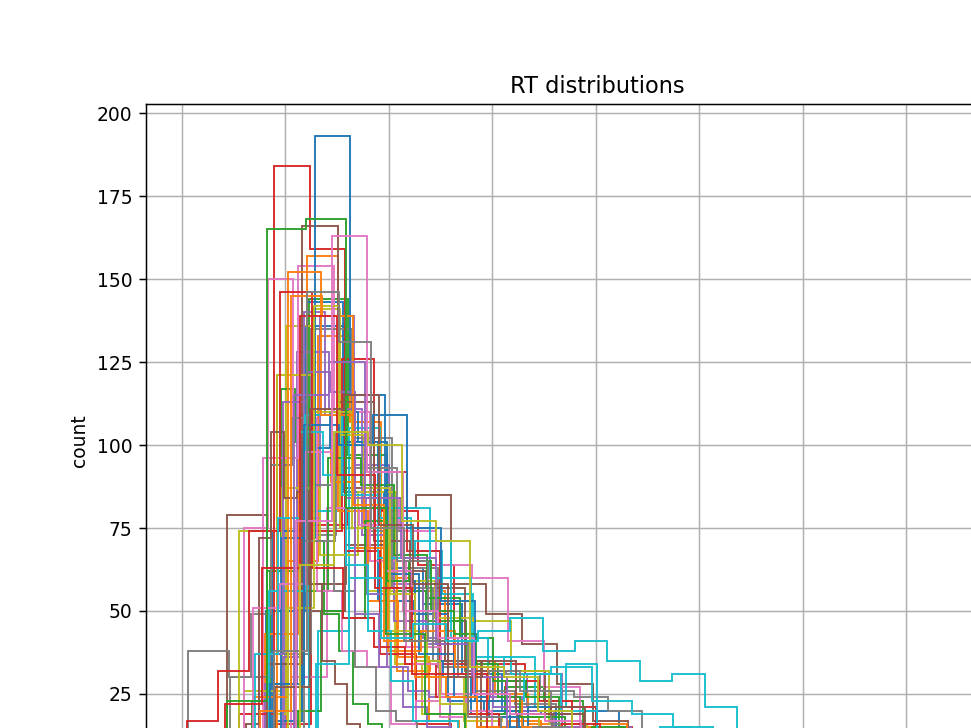

In [7]:
data = hddm.load_csv('AllSubjData_1.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.dropna(subset = ['response'],axis = 0)
data['response'] = data['response'].astype(np.int)

# data = hddm.utils.flip_errors(data)
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='rt', ylabel='count', title='RT distributions')
for s in np.unique(data['subj_idx']):
    data['rt'][data['subj_idx'] == s].hist(bins=20, histtype='step', ax=ax)

<IPython.core.display.Javascript object>


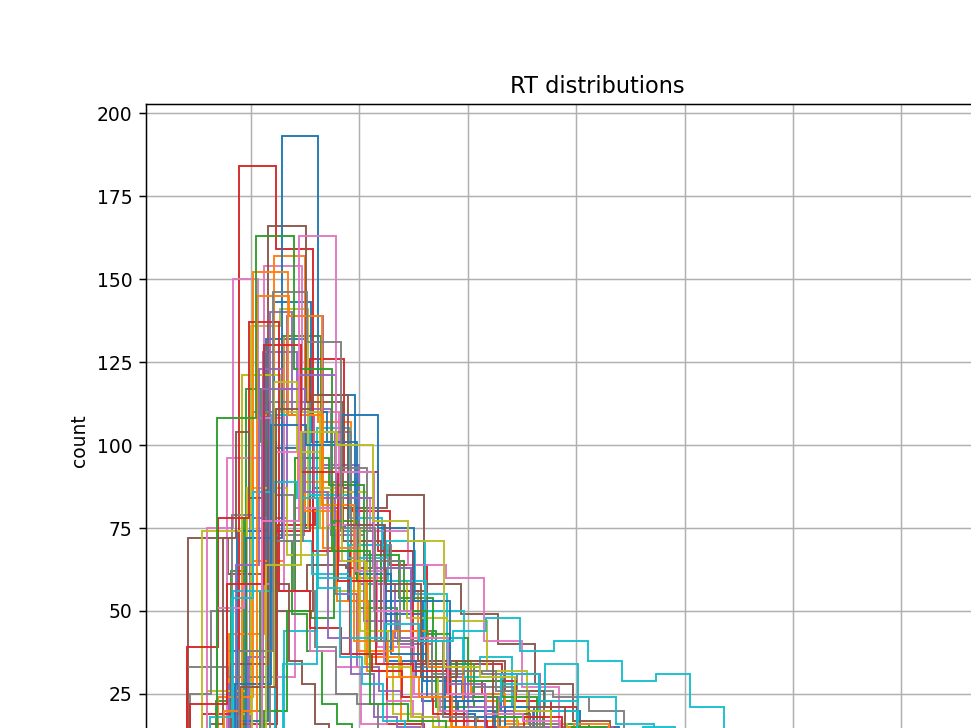

In [8]:
data = data[data.rt>.2]
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='rt', ylabel='count', title='RT distributions')
for s in np.unique(data['subj_idx']):
    data['rt'][data['subj_idx'] == s].hist(bins=20, histtype='step', ax=ax)


In [10]:
#select columns
group_data = data.loc[:, ['subj_idx','response','rt','Instruction','Taste_centered','Health_centered']]
group_data.head(40)
#simulation parameters
n_samples = 11000
n_burn    = 1000


In [11]:
data.shape

(26744, 14)

In [12]:
# regression NATURAL #
nat_data = group_data[group_data.Instruction == 'Respond Naturally'].copy()
reg = 'v ~ Taste_centered + Health_centered'
model_6Param_group_nat_traces = os.path.join('FitResults2','models','6Param_traces_nat.db')
# model_6Param_group_nat = hddm.HDDMRegressor(nat_data,reg, bias = True, p_outlier = .05, group_only_regressors = False)
# model_6Param_group_nat.find_starting_values()
# model_6Param_group_nat.sample(n_samples,burn=n_burn,dbname=model_6Param_group_nat_traces,db='pickle')
# savePath_model = os.path.join('FitResults2','models','model_6Param_group_nat.csv')
# model_6Param_group_nat.save(savePath_model)

# # #print#
# # # model_group_nat= hddm.load('model_group_reg2')
# # model_name = 'stats_model_6Param_group_nat.csv'
# # model_6Param_group_nat.print_stats(fname=model_name)

# #stats#
# savePath_stats = os.path.join('FitResults2','stats','stats_6Param_group_nat.csv')
# model_6Param_group_nat.gen_stats().to_csv(savePath_stats)

# # plot posteriors
# model_6Param_group_nat.plot_posteriors(['v_Taste_centered','v_Health_centered','v_Intercept','a','z','t'])

In [13]:
model = hddm.load(savePath_model)
model.print_stats()

C:\Users\labadmin\.conda\envs\py36\lib\site-packages\hddm\models\hddm_regression.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  params[reg_outcome] = params[reg_outcome].ix[value['rt'].index].values


                                  mean         std         2.5q         25q         50q          75q       97.5q       mc err
a                              1.89195   0.0380872      1.81103     1.86699     1.89263      1.91752     1.96512   0.00160854
a_std                         0.261324    0.031164     0.208761    0.238121    0.259655     0.279886    0.332366   0.00143709
a_subj.104                     2.27845   0.0933454      2.10805     2.21168     2.27731      2.33479     2.47455   0.00424744
a_subj.105                     1.65966   0.0692789      1.52729     1.61158     1.65809        1.704     1.80701    0.0032912
a_subj.106                     2.30185    0.118499       2.0884     2.21544     2.29546      2.37808     2.53977   0.00617741
a_subj.107                     2.10772   0.0817677      1.94725     2.05354     2.10581      2.16162      2.2723   0.00388967
a_subj.111                     1.80528   0.0845583      1.65313     1.74513     1.80095      1.86185     1.97537   0.0

C:\Users\labadmin\.conda\envs\py36\lib\site-packages\hddm\models\hddm_regression.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  params[reg_outcome] = params[reg_outcome].ix[value['rt'].index].values


In [7]:
# regression HEALTH #
health_index = (group_data.Instruction == 'Focus on Healthiness').copy()
reg = 'v ~ Taste_centered + Health_centered'
model_6Param_group_health_traces = os.path.join('FitResults2','models','6Param_traces_health.db')
model_6Param_group_health = hddm.HDDMRegressor(group_data.loc[health_index],reg, bias = True, p_outlier = .05, group_only_regressors = False)
model_6Param_group_health.find_starting_values()
model_6Param_group_health.sample(n_samples,burn=n_burn,dbname=model_6Param_group_health_traces,db='pickle')
savePath_model = os.path.join('FitResults2','models','model_6Param_group_health')
model_6Param_group_health.save(savePath_model)

# #print#
# # model_group_nat= hddm.load('model_group_reg2')
# model_name = 'stats_model_6Param_group_nat.csv'
# model_6Param_group_nat.print_stats(fname=model_name)

#stats#
savePath_stats = os.path.join('FitResults2','stats','stats_6Param_group_health')
model_6Param_group_health.gen_stats().to_csv(savePath_stats)

# plot posteriors
model_6Param_group_health.plot_posteriors(['v_Taste_centered','v_Health_centered','v_Intercept','a','z','t'])

Adding these covariates:
['v_Intercept', 'v_Taste_centered', 'v_Health_centered']


C:\Users\labadmin\.conda\envs\py36\lib\site-packages\hddm\utils.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  data.ix[idx, 'rt'] = -data.ix[idx, 'rt']
C:\Users\labadmin\.conda\envs\py36\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
C:\Users\labadmin\.conda\envs\py36\lib\site-packages\hddm\models\hddm_regression.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

 [-----------------100%-----------------] 11001 of 11000 complete in 11660.3 secWARNING: Will not save custom link functions.
Plotting a


<IPython.core.display.Javascript object>

Plotting t


<IPython.core.display.Javascript object>

Plotting z


<IPython.core.display.Javascript object>

Plotting v_Intercept


<IPython.core.display.Javascript object>

Plotting v_Taste_centered


<IPython.core.display.Javascript object>

Plotting v_Health_centered


<IPython.core.display.Javascript object>

In [ ]:
# regression DESIRE #
desire_index = group_data.Instruction == 'Decrease Desire'
reg = 'v ~ Taste_centered + Health_centered'
model_6Param_group_desire_traces = os.path.join('FitResults2','models','6Param_traces_desire.db')
model_6Param_group_desire = hddm.HDDMRegressor(group_data.loc[desire_index],reg, bias = True, p_outlier = .05, group_only_regressors = False)
model_6Param_group_desire.find_starting_values()
model_6Param_group_desire.sample(n_samples,burn=n_burn,dbname=model_6Param_group_desire_traces,db='pickle')
savePath_model = os.path.join('FitResults2','models','model_6Param_group_desire')
model_6Param_group_desire.save(savePath_model)

# #print#
# # model_group_nat= hddm.load('model_group_reg2')
# model_name = 'stats_model_6Param_group_nat.csv'
# model_6Param_group_nat.print_stats(fname=model_name)

#stats#
savePath_stats = os.path.join('FitResults2','stats','stats_6Param_group_desire')
model_6Param_group_desire.gen_stats().to_csv(savePath_stats)

# plot posteriors
model_6Param_group_desire.plot_posteriors(['v_Taste_centered','v_Health_centered','v_Intercept','a','z','t'])

Adding these covariates:
['v_Intercept', 'v_Taste_centered', 'v_Health_centered']


C:\Users\labadmin\.conda\envs\py36\lib\site-packages\hddm\utils.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  data.ix[idx, 'rt'] = -data.ix[idx, 'rt']
C:\Users\labadmin\.conda\envs\py36\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
C:\Users\labadmin\.conda\envs\py36\lib\site-packages\hddm\models\hddm_regression.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

 [-----------------66%-----             ] 7358 of 11000 complete in 7645.3 sec

Text(0.5, 1.0, 'spbias')

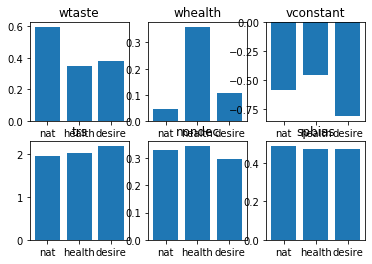

In [4]:
##compare estimated params across conditions##
import os
subjects = [104,105,106,107,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,129,130,134,135,136,137,138,
           140,141,142,143,144,145,146,148,150,151,153,155,156,157,158,159,161,162,163,164,165,166]
subjects = [str(s) for s in subjects]

allParams = pd.DataFrame({'subj':subjects})
conds   = ['nat','health','desire']
params  = ['wtaste','whealth','vconstant','trs','nondec','spbias']
params2 = ['v_Taste_centered','v_Health_centered','v_Intercept','a','t','z']

#create a single dataframe with all params
for c in conds:
    hddmOut = pd.read_csv(os.path.join('FitResults2','stats','stats_6Param_group_'+c+'.csv'))
    for p,param in enumerate(params):
        rname = c+'-'+param
        allParams[rname] = np.full((len(subjects),1),np.nan)
        for s, subj in enumerate(subjects):
            allParams.loc[allParams.subj==subj,rname] = np.asarray(hddmOut[hddmOut['Unnamed: 0'] == params2[p]+'_subj.'+subj]['mean'])[0]

savefile = os.path.join('FitResults2','stats','HDDM_allParams_6Param.csv')
allParams.to_csv(savefile)
#compare stats
from scipy import stats
from matplotlib import pyplot as plt
plt.subplots(2,3)
plt.subplot(2,3,1)
plt.bar(conds,[allParams['nat-wtaste'].mean(),allParams['health-wtaste'].mean(),allParams['desire-wtaste'].mean()])
plt.title('wtaste')
plt.subplot(2,3,2)
plt.bar(conds,[allParams['nat-whealth'].mean(),allParams['health-whealth'].mean(),allParams['desire-whealth'].mean()])
plt.title('whealth')
plt.subplot(2,3,3)
plt.bar(conds,[allParams['nat-vconstant'].mean(),allParams['health-vconstant'].mean(),allParams['desire-vconstant'].mean()])
plt.title('vconstant')
plt.subplot(2,3,4)
plt.bar(conds,[allParams['nat-trs'].mean(),allParams['health-trs'].mean(),allParams['desire-trs'].mean()])
plt.title('trs')
plt.subplot(2,3,5)
plt.bar(conds,[allParams['nat-nondec'].mean(),allParams['health-nondec'].mean(),allParams['desire-nondec'].mean()])
plt.title('nondec')
plt.subplot(2,3,6)
plt.bar(conds,[allParams['nat-spbias'].mean(),allParams['health-spbias'].mean(),allParams['desire-spbias'].mean()])
plt.title('spbias')

In [ ]:
print(model_6Param_group_nat.dic)
print(model_6Param_group_health.dic)
print(model_6Param_group_desire.dic)

In [ ]:
print(model_6Param_group_nat.nodes_db.node['v_Intercept'])

In [ ]:
v_taste_nat, v_health_nat, v_constant_nat = \
model_6Param_group_nat.nodes_db.node[['v_Taste_centered','v_Health_centered','v_Intercept']]
v_taste_health, v_health_health, v_constant_health = \
model_6Param_group_health.nodes_db.node[['v_Taste_centered','v_Health_centered','v_Intercept']]
v_taste_desire, v_health_desire, v_constant_desire = \
model_6Param_group_desire.nodes_db.node[['v_Taste_centered','v_Health_centered','v_Intercept']]

hddm.analyze.plot_posterior_nodes([v_taste_nat, v_taste_health, v_taste_desire])
plt.xlabel('taste drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of taste drift-rate group means by CONDITION')
L=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
L.get_texts()[0].set_text('Natural')
L.get_texts()[1].set_text('Health')
L.get_texts()[2].set_text('Decrease')


hddm.analyze.plot_posterior_nodes([v_health_nat, v_health_health, v_health_desire])
plt.xlabel('health drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of health drift-rate group means by CONDITION')
L=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
L.get_texts()[0].set_text('Natural')
L.get_texts()[1].set_text('Health')
L.get_texts()[2].set_text('Decrease')

hddm.analyze.plot_posterior_nodes([v_constant_nat, v_constant_health, v_constant_desire])
plt.xlabel('constant drift')
plt.ylabel('Posterior probability')
plt.title('Posterior of constant drift group means by CONDITION')
L=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
L.get_texts()[0].set_text('Natural')
L.get_texts()[1].set_text('Health')
L.get_texts()[2].set_text('Decrease')



In [ ]:
trs_nat, nondec_nat, spbias_nat          = model_6Param_group_nat.nodes_db.node[['a','t','z']]
trs_health, nondec_health, spbias_health = model_6Param_group_health.nodes_db.node[['a','t','z']]
trs_desire, nondec_desire, spbias_desire = model_6Param_group_desire.nodes_db.node[['a','t','z']]

hddm.analyze.plot_posterior_nodes([trs_nat,trs_health, trs_desire])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of threshold group means by CONDITION')
L=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
L.get_texts()[0].set_text('Natural')
L.get_texts()[1].set_text('Health')
L.get_texts()[2].set_text('Decrease')


hddm.analyze.plot_posterior_nodes([nondec_nat,nondec_health, nondec_desire])
plt.xlabel('nondec')
plt.ylabel('Posterior probability')
plt.title('Posterior of nondecision time group means by CONDITION')
L=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
L.get_texts()[0].set_text('Natural')
L.get_texts()[1].set_text('Health')
L.get_texts()[2].set_text('Decrease')

hddm.analyze.plot_posterior_nodes([spbias_nat,spbias_health, spbias_desire])
plt.xlabel('spbias')
plt.ylabel('Posterior probability')
plt.title('Posterior of spbias group means by CONDITION')
L=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
L.get_texts()[0].set_text('Natural')
L.get_texts()[1].set_text('Health')
L.get_texts()[2].set_text('Decrease')


In [ ]:
#posterior predictive checks
model_6Param_group_nat = hddm.load(os.path.join('FitResults2','models','model_6Param_group_nat'))
n_samples = 100
ppc_data_nat = hddm.utils.post_pred_gen(model_6Param_group_nat,samples = n_samples)
ppc_data_nat_savefile = os.path.join('FitResults2','ppc','ppc_data_6Param_nat.csv')
ppc_data_nat.to_csv(ppc_data_nat_savefile)

model_6Param_group_health = hddm.load(os.path.join('FitResults2','models','model_6Param_group_health'))
n_samples = 100
ppc_data_health = hddm.utils.post_pred_gen(model_6Param_group_health,samples = n_samples)
ppc_data_health_savefile = os.path.join('FitResults2','ppc','ppc_data_6Param_health.csv')
ppc_data_health.to_csv(ppc_data_health_savefile)

model_6Param_group_desire = hddm.load(os.path.join('FitResults2','models','model_6Param_group_desire'))
n_samples = 100
ppc_data_desire = hddm.utils.post_pred_gen(model_6Param_group_desire,samples = n_samples)
ppc_data_desire_savefile = os.path.join('FitResults2','ppc','ppc_data_6Param_desire.csv')
ppc_data_desire.to_csv(ppc_data_desire_savefile)


ppc_compare = hddm.utils.post_pred_stats(group_data, ppc_data)


C:\Users\labadmin\.conda\envs\py36\lib\site-packages\hddm\models\hddm_regression.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  params[reg_outcome] = params[reg_outcome].ix[value['rt'].index].values
C:\Users\labadmin\.conda\envs\py36\lib\site-packages\kabuki\analyze.py:324: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  iter_data = ((name, model.data.ix[obs['node'].value.index]) for name, obs in model.iter_observeds())
C:\Users\labadmin\.conda\envs\py36\lib\site-packages\hddm\models\hddm_regression.py:45: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

 [-----------------60%--                ] 30 of 50 complete in 2100.4 sec

In [102]:
ppc_data = pd.read_csv(os.path.join('FitResults2','ppc','ppc_data_6Param_nat_500samples.csv'))

In [191]:
# subjdata = ppc_data[ppc_data['subj_idx']==104]
# samples = np.unique(subjdata['sample'])
# subjdata['trials'] = subjdata['Unnamed: 2']
# subjdata = subjdata.drop(['Unnamed: 2'],axis = 1)
# # subjdata['rt_sampled'][subjdata['Unnamed: 2'] == samples[0]]
# # # ppc_data['sample'][ppc_data['subj_idx']==104] == samples[0]
# # # # samples[1]
# # # 
# for t in range(subjdata['trials'].max()+1):
#     subjdata['rt_sampled'][subjdata['trials']==t].mean
    
    

C:\Users\hajih\Anaconda3\envs\hddm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,node,sample,index_sampled,rt_sampled,index,subj_idx,response,rt,Instruction,Taste_centered,Health_centered,trials
0,wfpt.104,0,0,-0.431605,0,104,0,-1.190808,Respond Naturally,-2.289778,2.445,0
1,wfpt.104,0,1,-0.660405,1,104,0,-1.548576,Respond Naturally,-2.289778,2.445,1
2,wfpt.104,0,2,-0.690405,2,104,0,-1.322498,Respond Naturally,-2.289778,-0.555,2
3,wfpt.104,0,3,-0.927405,3,104,0,-1.240121,Respond Naturally,-2.289778,2.445,3
4,wfpt.104,0,4,1.812740,4,104,1,0.908235,Respond Naturally,2.710222,-2.555,4
...,...,...,...,...,...,...,...,...,...,...,...,...
89495,wfpt.104,499,535,1.020947,535,104,1,0.538676,Respond Naturally,1.710222,-2.555,174
89496,wfpt.104,499,536,-1.776026,536,104,0,-0.678014,Respond Naturally,-2.289778,-2.555,175
89497,wfpt.104,499,537,-0.692026,537,104,0,-0.457518,Respond Naturally,-1.289778,2.445,176
89498,wfpt.104,499,538,-0.393426,538,104,1,1.418666,Respond Naturally,0.710222,2.445,177


mdl.find_starting_values()
mdl.sample(1000, burn = 20)